In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


In [3]:
df=pd.read_csv("/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Selecting numerical features for regression (excluding categorical columns)
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                      'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 
                      'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

# Encoding categorical features (Gender)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Defining X (features) and y (target variable)
X = df[numerical_features + ['Gender']]  # Adding 'Gender' after encoding
y = df['Calories_Burned']

# Splitting the data (initial split for default 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Checking dataset sizes after split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((778, 13), (195, 13), (778,), (195,))

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function to perform linear regression with variable train-test split and dataset sizes
def perform_linear_regression(X, y, train_size=0.8, random_seed=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_seed)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    return model, mse, y_test, y_pred

# Test the function with default 80-20 split
model, mse, y_test, y_pred = perform_linear_regression(X, y, train_size=0.8)

# Output the Mean Squared Error
mse


1637.416126992665

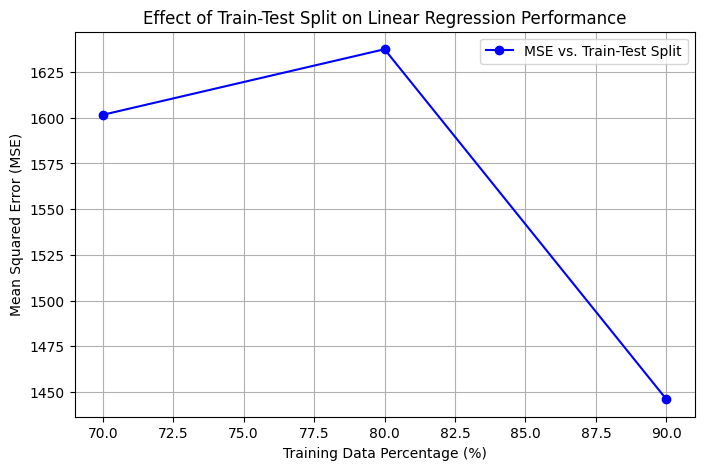

In [7]:
import matplotlib.pyplot as plt

# Experiment with different train-test splits
train_sizes = [0.7, 0.8, 0.9]
mse_results_split = []

for size in train_sizes:
    _, mse, _, _ = perform_linear_regression(X, y, train_size=size)
    mse_results_split.append(mse)

# Plot MSE vs Train-Test Split
plt.figure(figsize=(8, 5))
plt.plot([70, 80, 90], mse_results_split, marker='o', color='b', label="MSE vs. Train-Test Split")
plt.xlabel('Training Data Percentage (%)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Train-Test Split on Linear Regression Performance')
plt.grid(True)
plt.legend()
plt.show()


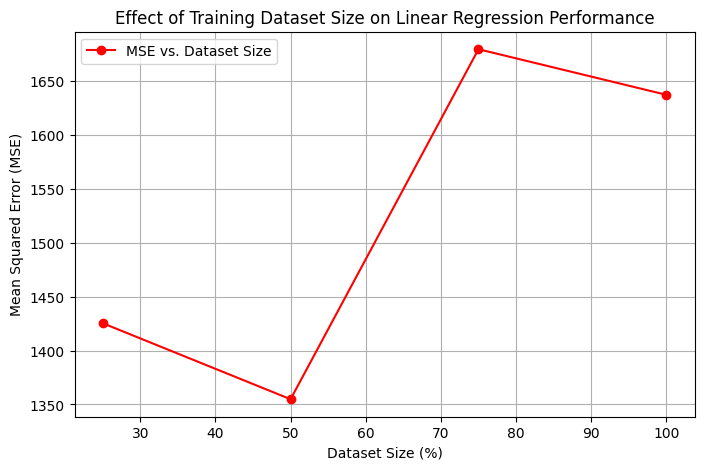

In [8]:
# Experiment with different dataset sizes
dataset_sizes = [0.25, 0.5, 0.75, 1.0]
mse_results_size = []

for size in dataset_sizes:
    model, mse, y_test, y_pred = perform_linear_regression(X[:int(size * len(X))], y[:int(size * len(y))], train_size=0.8)
    mse_results_size.append(mse)

# Plot MSE vs Dataset Size
plt.figure(figsize=(8, 5))
plt.plot([25, 50, 75, 100], mse_results_size, marker='o', color='r', label="MSE vs. Dataset Size")
plt.xlabel('Dataset Size (%)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Training Dataset Size on Linear Regression Performance')
plt.grid(True)
plt.legend()
plt.show()


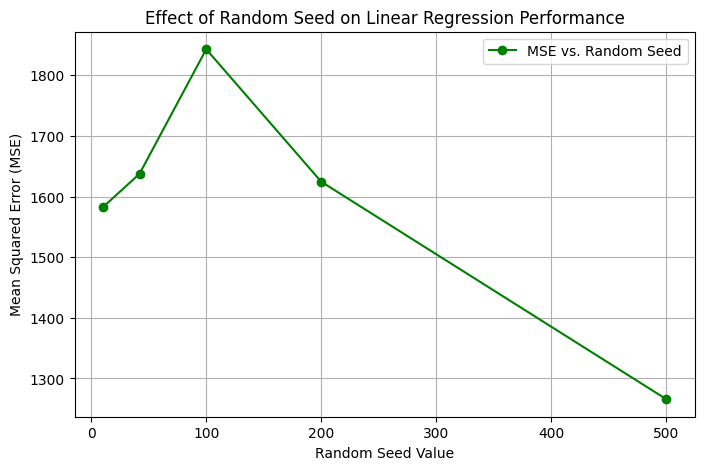

In [10]:
# Experiment with different random seeds
random_seeds = [10, 42, 100, 200, 500]
mse_results_seed = []

for seed in random_seeds:
    _, mse, _, _ = perform_linear_regression(X, y, train_size=0.8, random_seed=seed)
    mse_results_seed.append(mse)

# Plot MSE vs Random Seed
plt.figure(figsize=(8, 5))
plt.plot(random_seeds, mse_results_seed, marker='o', color='g', label="MSE vs. Random Seed")
plt.xlabel('Random Seed Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Random Seed on Linear Regression Performance')
plt.grid(True)
plt.legend()
plt.show()
